In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import copy 

import numpy as np 

import multiprocessing
from multiprocessing import Pool
from contextlib import closing

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec

# Put the fit_sersic.py, parameters.py, and priors.py files in the same folder
from fit_sersic import Sersic, display_model_1d
from fit_sersic import config_params, prof_curvefit, update_params 
from fit_sersic import emcee_fit_one_sersic, ln_probability, visual_emcee

# Install emcee sampling tool: `pip install --upgrade emcee`
# To visualize the result, also need `corner`: `pip install --upgrade corner`
rcParams.update({'font.size': 25})

In [2]:
import corner

In [3]:
from astropy.modeling import models, fitting
import matplotlib.colors as colors
import matplotlib.cm as cmx
from pylab import figure, text, scatter, show
from math import factorial
import h5py

In [4]:
all_profs = np.load('/Users/RAJ/2019_paper/paper_figures/fitting_files/summary_median.npy')

rad_kpc = all_profs['rad_kpc']

In [5]:
# n_walker should at least > n_dim ** 2
n_walkers = 128
n_burnin, n_samples = 2000, 500

# You might want to take advantage of the multiple processors you have
n_jobs = multiprocessing.cpu_count()

In [6]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_1_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_1_prof_ins'], all_profs['bin_1_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_1_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_1_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 2.99484465 86.48434739 11.08635741]
Error of Sersic parameters from curvefit: [ 0.18310339 10.08012056  0.63526542]
# Running burn-in step...


100%|██████████| 2000/2000 [04:46<00:00,  6.99it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.022113281250000002
#------------------------------------------------------
#  Best ln(Probability):   -16.50295
[ 2.98914678 86.36638955 11.09630365]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.03377343 88.10053325 11.02171619]
#------------------------------------------------------
(3.0203676871220337, 0.26820984317298, 0.24524672606196773)
(87.7886993495043, 15.977599155740023, 12.257784418280352)
(10.986360386452233, 0.7988057509432505, 0.8423482239256863)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:46<00:00,  2.21it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.387078125
#------------------------------------------------------
#  Best ln(Probability):   -16.50245
[ 2.99344802 86.51617998 11.08445677]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.05509345 89.57774244 10.94175363]
#------------------------------------------------------
(3.033992368159616, 0.22695702825894815, 0.19248963107162886)
(88.07699050529543, 12.679120642042633, 10.389421431719754)
(10.971376166312282, 0.6803804914213192, 0.715292938884204)
#------------------------------------------------------


In [7]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_2_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_2_prof_ins'], all_profs['bin_2_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_2_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_2_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 3.39443574 46.56212111 12.89267083]
Error of Sersic parameters from curvefit: [0.15103989 4.73698153 0.57663319]
# Running burn-in step...


100%|██████████| 2000/2000 [05:04<00:00,  6.57it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.030468750000000003
#------------------------------------------------------
#  Best ln(Probability):   -11.58090
[ 3.39123739 46.84710589 12.87167117]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.44560488 48.18960297 12.79903983]
#------------------------------------------------------
(3.470544616288874, 0.28484598777711456, 0.2852669845153146)
(48.48639342696352, 9.959181101426822, 8.774523983043856)
(12.633808928063125, 1.1358896748356084, 1.0096212838545249)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [04:12<00:00,  1.98it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.35492187499999994
#------------------------------------------------------
#  Best ln(Probability):   -11.57920
[ 3.40669007 46.96672054 12.84134623]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.46606297 49.45444299 12.6657464 ]
#------------------------------------------------------
(3.4538279392640843, 0.2841367242348425, 0.26716434740484507)
(48.62821704508841, 9.522448910458372, 8.247934632030848)
(12.641254594556164, 1.0668265214093946, 0.9622041130366341)
#------------------------------------------------------


In [8]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_3_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_3_prof_ins'], all_profs['bin_3_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_3_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_3_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.31595109 35.64461093 13.44426098]
Error of Sersic parameters from curvefit: [0.41504821 8.26185962 1.37503531]
# Running burn-in step...


100%|██████████| 2000/2000 [04:52<00:00,  6.83it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.017796875000000004
#------------------------------------------------------
#  Best ln(Probability):   -16.01682
[ 4.35081412 35.89670465 13.38708113]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.57754596 41.40654105 12.90250421]
#------------------------------------------------------
(4.476976594354042, 0.7205889915236066, 0.577307652761252)
(39.41859557322333, 15.326425320467699, 11.283666194935364)
(12.81206989247642, 2.0552780411836657, 1.7173316215001062)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [04:26<00:00,  1.88it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.28817187499999997
#------------------------------------------------------
#  Best ln(Probability):   -16.01529
[ 4.35130903 36.23600113 13.3364495 ]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.51001265 40.37196278 13.06848917]
#------------------------------------------------------
(4.4806297425690556, 0.6025907405692159, 0.5191507788219223)
(38.34791558606792, 12.752874916651542, 9.646076541739752)
(12.990948811586856, 1.7491955384842939, 1.6189092453046978)
#------------------------------------------------------


In [9]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_4_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_4_prof_ins'], all_profs['bin_4_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_4_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_4_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 3.08502258 19.82575701 17.89288221]
Error of Sersic parameters from curvefit: [0.16728386 1.11509847 0.50890092]
# Running burn-in step...


100%|██████████| 2000/2000 [09:28<00:00,  3.52it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.16408984375000002
#------------------------------------------------------
#  Best ln(Probability):    -9.73932
[ 3.09170245 19.81786419 17.88796679]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.17243887 20.10544843 17.7523374 ]
#------------------------------------------------------
(3.152519693347226, 0.30378546076705426, 0.27200093706865935)
(20.028490261705706, 2.0836649349831013, 1.7845907418623526)
(17.750826303658954, 0.8492140468672424, 0.8674258656430212)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:12<00:00,  2.60it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.39617187500000006
#------------------------------------------------------
#  Best ln(Probability):    -9.74086
[ 3.07347021 19.7430707  17.92804673]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.14159342 20.03516184 17.80998769]
#------------------------------------------------------
(3.144587433733442, 0.3335834268771056, 0.28238418599339266)
(20.030680610265414, 2.181310159368607, 1.9014062365610158)
(17.75257901946792, 0.9095182438132348, 0.9123526102938904)
#------------------------------------------------------


In [10]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_5_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_5_prof_ins'], all_profs['bin_5_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_5_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_5_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 6.08366667 22.60344327 15.25497074]
Error of Sersic parameters from curvefit: [0.63763536 3.59573986 1.18573656]
# Running burn-in step...


100%|██████████| 2000/2000 [04:40<00:00,  7.14it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.03705859374999999
#------------------------------------------------------
#  Best ln(Probability):   -12.58428
[ 6.15580221 23.367305   15.02971444]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.61081346 25.02691877 14.8602311 ]
#------------------------------------------------------
(6.618546339514602, 1.4629391447095657, 1.2933993715223586)
(24.57444156034604, 8.822688168683474, 6.9121161566948395)
(14.613390033811044, 2.340898411507702, 2.0572732648834986)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:21<00:00,  2.48it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.2991875
#------------------------------------------------------
#  Best ln(Probability):   -12.58205
[ 6.05864446 22.13818874 15.40249166]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.67916483 25.24467031 14.75432752]
#------------------------------------------------------
(6.675261824284264, 1.4100553742862347, 1.2758678888913861)
(24.68643649578121, 8.301705524535848, 6.520296948553607)
(14.546615618369112, 2.29180864334789, 1.905437289332573)
#------------------------------------------------------


In [11]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_1_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_1_prof_exs'], all_profs['bin_1_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_1_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_1_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.67200233 43.93138305 12.19812185]
Error of Sersic parameters from curvefit: [0.18636987 3.32703979 0.44481813]
# Running burn-in step...


100%|██████████| 2000/2000 [05:00<00:00,  6.65it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.03950390625
#------------------------------------------------------
#  Best ln(Probability):    -9.78374
[ 4.6438342  43.37361369 12.27455785]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.7442285  45.22048409 12.11794673]
#------------------------------------------------------
(4.749371587398578, 0.4216615875845866, 0.4070654040968318)
(45.27705052188177, 7.75108337373382, 7.506305736068725)
(12.016733527216484, 1.0372002243061083, 0.8910734242486029)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:24<00:00,  2.45it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.349953125
#------------------------------------------------------
#  Best ln(Probability):    -9.78289
[ 4.66690227 44.10288219 12.18283112]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.7492403  45.71183742 12.06570853]
#------------------------------------------------------
(4.757524755680002, 0.4050425417407464, 0.40580850774157806)
(45.02984322971281, 7.79413265489476, 6.726819398147441)
(12.034905312875097, 0.9833210921462427, 0.8766274374184189)
#------------------------------------------------------


In [12]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_2_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_2_prof_exs'], all_profs['bin_2_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_2_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_2_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.54267741 23.11312835 15.10800499]
Error of Sersic parameters from curvefit: [0.20098758 1.12867966 0.36395959]
# Running burn-in step...


100%|██████████| 2000/2000 [07:35<00:00,  4.39it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.11285937500000001
#------------------------------------------------------
#  Best ln(Probability):    -7.74882
[ 5.5670123  23.24699177 15.06231543]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.59267542 23.30455128 15.09836575]
#------------------------------------------------------
(5.602796938528545, 0.5092958296458292, 0.4735589569979197)
(23.266068849526985, 2.913856434263643, 2.60944719970961)
(15.039514541748716, 0.905175431445933, 0.8240705891909066)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:17<00:00,  2.53it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.3584062499999999
#------------------------------------------------------
#  Best ln(Probability):    -7.74831
[ 5.54001078 23.14660527 15.0986792 ]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.63943823 23.37210222 15.06795825]
#------------------------------------------------------
(5.624102060500783, 0.5006301230280421, 0.4810989536460486)
(23.31182308026648, 2.9846742769942196, 2.6910126941934465)
(15.02151618099532, 0.9185574791304383, 0.8306559749202229)
#------------------------------------------------------


In [13]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_3_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_3_prof_exs'], all_profs['bin_3_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_3_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_3_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.46919846 28.28443813 14.51679157]
Error of Sersic parameters from curvefit: [0.28512016 2.84032706 0.70377681]
# Running burn-in step...


100%|██████████| 2000/2000 [06:14<00:00,  5.33it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.051511718750000005
#------------------------------------------------------
#  Best ln(Probability):   -11.48473
[ 4.46433381 28.40936701 14.49941282]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.67101674 30.35447555 14.15044567]
#------------------------------------------------------
(4.622008758523442, 0.5508049215958906, 0.5154638682228905)
(29.67061835504694, 6.259058805853222, 5.097487342301704)
(14.165104034682082, 1.3539856512889603, 1.2687756186825272)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:44<00:00,  2.23it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.332703125
#------------------------------------------------------
#  Best ln(Probability):   -11.48236
[ 4.47097304 28.31648069 14.50675558]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.64965248 30.40663107 14.17015297]
#------------------------------------------------------
(4.630417756822498, 0.5589684006923319, 0.516295679956456)
(29.530575861131773, 6.587518075354353, 4.98346869377578)
(14.19893592478896, 1.3280449686967675, 1.3073086034712134)
#------------------------------------------------------


In [14]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_4_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_4_prof_exs'], all_profs['bin_4_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_4_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_4_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.41884363 14.61271617 18.49973168]
Error of Sersic parameters from curvefit: [0.2421725  0.69997235 0.43485886]
# Running burn-in step...


100%|██████████| 2000/2000 [09:10<00:00,  3.63it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.18034765625
#------------------------------------------------------
#  Best ln(Probability):    -7.98223
[ 5.42600847 14.64577425 18.48207547]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.53347121 14.85473655 18.38252696]
#------------------------------------------------------
(5.521374980824312, 0.5407583196914203, 0.48327444209040493)
(14.786172278926168, 1.6599719960814578, 1.5334366932294738)
(18.3579898886259, 1.0201399117747947, 0.9378639745784234)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:26<00:00,  2.42it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.371609375
#------------------------------------------------------
#  Best ln(Probability):    -7.98305
[ 5.42108447 14.58301002 18.52051082]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.55673583 14.95257246 18.33473916]
#------------------------------------------------------
(5.535111912450022, 0.550235887064316, 0.5177794798517823)
(14.780788886873644, 1.6776154494337767, 1.5124143338818907)
(18.366575972273804, 1.0076675510213242, 0.9453199303642492)
#------------------------------------------------------


In [15]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_5_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_5_prof_exs'], all_profs['bin_5_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_5_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_5_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.93693435  7.26964459 24.27919756]
Error of Sersic parameters from curvefit: [0.70058134 0.68957382 1.08308384]
# Running burn-in step...


100%|██████████| 2000/2000 [07:40<00:00,  4.34it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.11787109375000002
#------------------------------------------------------
#  Best ln(Probability):    -9.32025
[ 6.89058264  4.88809826 29.20123901]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.6550093   6.41680214 25.9181508 ]
#------------------------------------------------------
(6.771989967810002, 1.6808120730805047, 1.6211485524541915)
(6.096949375128578, 1.5483266316692452, 0.979507401693037)
(26.257946913719888, 2.2935026926887154, 2.796082614095191)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:46<00:00,  2.21it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.3434531249999999
#------------------------------------------------------
#  Best ln(Probability):    -9.32069
[ 6.85110106  4.92433189 29.10296751]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.72812524  6.47817531 25.7943228 ]
#------------------------------------------------------
(6.861515391173491, 1.5976458132322087, 1.6496660137345867)
(6.063542917762418, 1.6480276325537284, 0.9876976709347094)
(26.300998831978234, 2.3757230340437054, 2.942746979786481)
#------------------------------------------------------


In [21]:
colors = plt.cm.plasma(np.linspace(0,1,10))

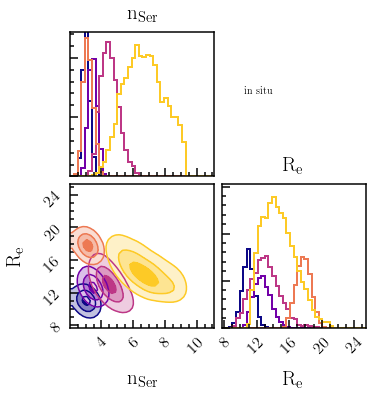

In [22]:
# Only plot the Sersic index and Re
bin1_ins_n_re = bin_1_ins['samples'][:, [0,2]]
bin2_ins_n_re = bin_2_ins['samples'][:, [0,2]]
bin3_ins_n_re = bin_3_ins['samples'][:, [0,2]]
bin4_ins_n_re = bin_4_ins['samples'][:, [0,2]]
bin5_ins_n_re = bin_5_ins['samples'][:, [0,2]]
params_label = [r'$ \rm n_{\rm Ser}$', r'$ \rm R_{\rm e}$']

all_samples = np.vstack([bin1_ins_n_re, bin2_ins_n_re,bin3_ins_n_re,bin4_ins_n_re,bin5_ins_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]



# Also need to adjust the weight
ns_hist_1, _ = np.histogram(bin1_ins_n_re[:, 0], bins=40) 
ns_hist_2, _ = np.histogram(bin2_ins_n_re[:, 0], bins=40) 
ns_hist_3, _ = np.histogram(bin3_ins_n_re[:, 0], bins=40) 
ns_hist_4, _ = np.histogram(bin4_ins_n_re[:, 0], bins=40) 
ns_hist_5, _ = np.histogram(bin5_ins_n_re[:, 0], bins=40) 
re_hist_1, _ = np.histogram(bin1_ins_n_re[:, 1], bins=40) 
re_hist_2, _ = np.histogram(bin2_ins_n_re[:, 1], bins=40)
re_hist_3, _ = np.histogram(bin3_ins_n_re[:, 1], bins=40)
re_hist_4, _ = np.histogram(bin4_ins_n_re[:, 1], bins=40)
re_hist_5, _ = np.histogram(bin5_ins_n_re[:, 1], bins=40)

hist_weight = np.sum([np.max(re_hist_1),np.max(re_hist_2),np.max(re_hist_3),np.max(re_hist_4),np.max(re_hist_5)])
all_samples_ns = np.vstack([ns_hist_1,ns_hist_2,ns_hist_3,ns_hist_4,ns_hist_5])
all_samples_re = np.vstack([re_hist_1,re_hist_2,re_hist_3,re_hist_4,re_hist_5])

#setting the hist_weights
max_n = np.max(all_samples_ns)
max_re = np.max(all_samples_re)


# Colors for in-situ and ex-situ
ORG = plt.get_cmap('OrRd')



fig_bin1 = corner.corner(
        bin1_ins_n_re,
        bins=40, color=colors[0],
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_fmt=None,
        verbose = False,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[0],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 1.0,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin2_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[2],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[2],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 1.01,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin3_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[4],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[4],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 2.2,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin4_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[6],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[6],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re))* 1.27 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin5_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[8],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0, 
                     "edgecolor": colors[8], "linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) *5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)


for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm in situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break





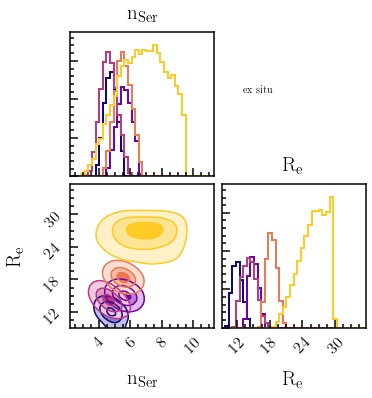

In [23]:
# Only plot the Sersic index and Re
bin1_exs_n_re = bin_1_exs['samples'][:, [0,2]]
bin2_exs_n_re = bin_2_exs['samples'][:, [0,2]]
bin3_exs_n_re = bin_3_exs['samples'][:, [0,2]]
bin4_exs_n_re = bin_4_exs['samples'][:, [0,2]]
bin5_exs_n_re = bin_5_exs['samples'][:, [0,2]]
params_label = [r'$ \rm n_{\rm Ser}$', r'$ \rm R_{\rm e}$']

all_samples = np.vstack([bin1_exs_n_re, bin2_exs_n_re,bin3_exs_n_re,bin4_exs_n_re,bin5_exs_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]




# Also need to adjust the weight
ns_hist_1, _ = np.histogram(bin1_exs_n_re[:, 0], bins=40) 
ns_hist_2, _ = np.histogram(bin2_exs_n_re[:, 0], bins=40) 
ns_hist_3, _ = np.histogram(bin3_exs_n_re[:, 0], bins=40) 
ns_hist_4, _ = np.histogram(bin4_exs_n_re[:, 0], bins=40) 
ns_hist_5, _ = np.histogram(bin5_exs_n_re[:, 0], bins=40) 
re_hist_1, _ = np.histogram(bin1_exs_n_re[:, 1], bins=40) 
re_hist_2, _ = np.histogram(bin2_exs_n_re[:, 1], bins=40)
re_hist_3, _ = np.histogram(bin3_exs_n_re[:, 1], bins=40)
re_hist_4, _ = np.histogram(bin4_exs_n_re[:, 1], bins=40)
re_hist_5, _ = np.histogram(bin5_exs_n_re[:, 1], bins=40)

#setting the hist_weights
all_samples_ns = np.vstack([ns_hist_1,ns_hist_2,ns_hist_3,ns_hist_4,ns_hist_5])
all_samples_re = np.vstack([re_hist_1,re_hist_2,re_hist_3,re_hist_4,re_hist_5])
max_n = np.max(all_samples_ns)
max_re = np.max(all_samples_re)

hist_weight = np.sum([np.max(re_hist_1),np.max(re_hist_2),np.max(re_hist_3),np.max(re_hist_4),np.max(re_hist_5)])


# Colors for in-situ and ex-situ
ORG = plt.get_cmap('OrRd')



fig_bin1 = corner.corner(
        bin1_exs_n_re,
        bins=40, color=colors[0],
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_fmt=None,
        verbose = False,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[0],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.0,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin2_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[2],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[2],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.01,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin3_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[4],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[4],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.5,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin4_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[6],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[6],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re))* 1.5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin5_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[8],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0, 
                     "edgecolor": colors[8], "linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) *5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)


for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm ex situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break


In [73]:
max_re

4304